In [2]:
import sqlite3

# Conectar a la base de datos
conn = sqlite3.connect('base_1.db')
cursor = conn.cursor()

# Crear la tabla si no existe
cursor.execute('''
    CREATE TABLE IF NOT EXISTS usuarios (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nombre TEXT NOT NULL,
        edad INTEGER NOT NULL)
''')

# Insertar datos
cursor.execute("INSERT INTO usuarios (nombre, edad) VALUES (?, ?)", ("Juan", 25))
cursor.execute("INSERT INTO usuarios (nombre, edad) VALUES (?, ?)", ("Ana", 30))
cursor.execute("INSERT INTO usuarios (nombre, edad) VALUES (?, ?)", ("Oscar", 34))

# Guardar los cambios
conn.commit()

# Consultar datos
cursor.execute("SELECT * FROM usuarios")
resultados = cursor.fetchall()

for fila in resultados:
    print(fila)

# Cerrar la conexión
conn.close()

(1, 'Juan', 25)
(2, 'Ana', 30)
(3, 'Juan', 25)
(4, 'Ana', 30)
(5, 'Oscar', 34)


In [3]:
import sqlite3
import pandas as pd

# Cargar los datos del archivo Excel
file_path = 'data.xlsx'  # Ajustar la ruta al archivo correcto
data = pd.read_excel(file_path)

# Conectar o crear la base de datos
conn = sqlite3.connect('base_2.db')
cursor = conn.cursor()

# Crear la tabla
cursor.execute('''
    CREATE TABLE IF NOT EXISTS usuarios (
        id INTEGER PRIMARY KEY,
        edad INTEGER,
        nivel_edu TEXT,
        ingreso_mensual REAL,
        sex TEXT,
        anios_esc INTEGER)
''')

# Insertar datos
for index, row in data.iterrows():
    cursor.execute('''
        INSERT INTO usuarios (id, edad, nivel_edu, ingreso_mensual, sex, anios_esc)
        VALUES (?, ?, ?, ?, ?, ?)''',
        (row['id'], row['edad'], row['nivel_edu'], row['ingreso_mensual'], row['sex'], row['anios_esc']))

# Guardar los cambios
conn.commit()

# Cerrar la conexión
conn.close()

print("Datos insertados correctamente en la base de datos.")

Datos insertados correctamente en la base de datos.


In [6]:
import sqlite3

# Conectar a la base de datos existente
conn = sqlite3.connect('base_2.db')
cursor = conn.cursor()

# Consulta para contar la cantidad de personas por género
cursor.execute('''
    SELECT sex, COUNT(*) as cantidad
    FROM usuarios
    GROUP BY sex
''')

# Obtener y mostrar los resultados
resultados = cursor.fetchall()
print(type(resultados))
print(resultados)

for fila in resultados:
    print(f"Género: {fila[0]}, Cantidad: {fila[1]}")

# Cerrar la conexión
conn.close()

<class 'list'>
[('Hombre', 6347), ('Mujer', 3933)]
Género: Hombre, Cantidad: 6347
Género: Mujer, Cantidad: 3933


In [8]:
import sqlite3

# Conectar a la base de datos existente
conn = sqlite3.connect('base_2.db')
cursor = conn.cursor()

# Consulta para obtener el promedio de edad por género
cursor.execute('''
    SELECT sex, AVG(edad) as promedio_edad
    FROM usuarios
    GROUP BY sex
''')

# Obtener y mostrar los resultados
resultados = cursor.fetchall()

for fila in resultados:
    print(f"Género: {fila[0]}, Promedio de Edad: {fila[1]:.2f} años")

# Cerrar la conexión
conn.close()

Género: Hombre, Promedio de Edad: 39.50 años
Género: Mujer, Promedio de Edad: 40.12 años


# **Pandas**

In [9]:
#Pandas
import pandas as pd
# Crear un DataFrame a partir de un diccionario
data = {
    'nombre': ['Ana', 'Luis', 'Carlos'],
    'edad': [22, 35, 58],
    'ciudad': ['Bogotá', 'Medellín', 'Cali']
}

df = pd.DataFrame(data)
print(df)

   nombre  edad    ciudad
0     Ana    22    Bogotá
1    Luis    35  Medellín
2  Carlos    58      Cali


In [10]:
import pandas as pd

# Leer el archivo Excel en un DataFrame
df = pd.read_excel('data.xlsx')

# Mostrar las primeras filas del DataFrame
print(df.head())

   id  edad                  nivel_edu  ingreso_mensual     sex  anios_esc
0   1    56        Secundaria completa             5375   Mujer         12
1   2    52  Medio superior y superior            12900  Hombre         17
2   3    25  Medio superior y superior            12000  Hombre         15
3   4    50        Secundaria completa             3870   Mujer          9
4   5    41  Medio superior y superior             1000   Mujer         17


In [11]:
promedio=df['edad'].mean()
print(promedio)

39.73696498054475


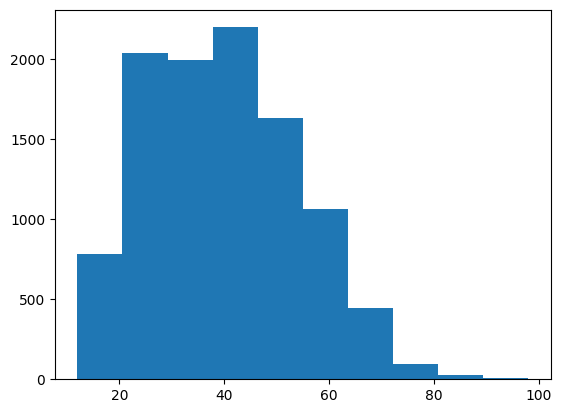

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['edad'])
plt.show()

In [17]:
genero=list(df['sex'])
edad=list(df['edad'])
print(type(genero))
print(genero[1])

<class 'list'>
Hombre


In [18]:
edad_hombre=[]
edad_mujer=[]
for i in range(len(genero)):
  if genero[i]=='Hombre':
    edad_hombre.append(edad[i])
  else:
    edad_mujer.append(edad[i])
print(edad_mujer)
print(edad_hombre)

[56, 50, 41, 36, 23, 35, 69, 21, 43, 40, 42, 40, 41, 47, 51, 21, 24, 22, 31, 26, 32, 56, 29, 18, 47, 27, 45, 18, 40, 19, 28, 51, 40, 39, 28, 19, 50, 53, 53, 19, 51, 48, 33, 64, 53, 55, 47, 48, 29, 23, 41, 39, 32, 41, 67, 24, 38, 38, 44, 32, 38, 29, 63, 63, 61, 27, 51, 50, 35, 14, 36, 46, 34, 32, 43, 17, 40, 18, 42, 30, 27, 20, 32, 40, 87, 51, 54, 43, 39, 39, 30, 43, 53, 39, 36, 49, 54, 26, 28, 26, 23, 44, 42, 29, 27, 26, 32, 20, 49, 42, 51, 30, 16, 46, 45, 54, 48, 42, 30, 54, 53, 42, 40, 48, 50, 35, 21, 36, 56, 23, 55, 44, 56, 33, 37, 23, 56, 59, 33, 34, 98, 26, 54, 25, 45, 48, 20, 29, 24, 33, 34, 35, 69, 38, 34, 37, 17, 35, 31, 49, 57, 22, 37, 26, 24, 60, 73, 35, 38, 39, 61, 35, 35, 18, 59, 39, 44, 45, 23, 50, 28, 56, 54, 34, 25, 32, 28, 38, 66, 32, 79, 45, 40, 26, 51, 20, 24, 47, 39, 37, 44, 55, 25, 40, 24, 35, 50, 57, 28, 31, 65, 22, 26, 26, 28, 25, 37, 27, 26, 54, 44, 44, 49, 22, 37, 82, 39, 45, 57, 48, 55, 43, 19, 73, 36, 36, 50, 40, 62, 46, 32, 28, 30, 39, 60, 26, 19, 61, 43, 33,

In [20]:
#promedio
av_edad_hombre=sum(edad_hombre)/len(edad_hombre)
av_edad_mujer=sum(edad_mujer)/len(edad_mujer)
print('La edad promedio del hombre es: ', av_edad_hombre)
print('La edad promedio de la muejes es: ',av_edad_mujer)

La edad promedio del hombre es:  39.49677012761935
La edad promedio de la muejes es:  40.12458682939232


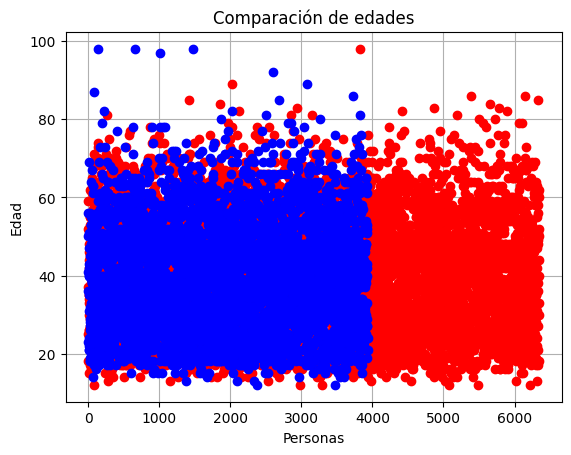

In [22]:
plt.plot(edad_hombre, 'ro')
plt.plot(edad_mujer, 'bo')
plt.title('Comparación de edades')
plt.xlabel('Personas')
plt.ylabel('Edad')
plt.grid()
plt.show()

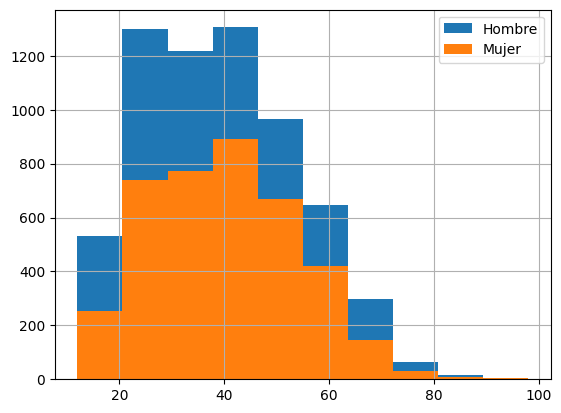

In [23]:
plt.hist(edad_hombre, label='Hombre')
plt.hist(edad_mujer, label='Mujer')
plt.legend()
plt.grid()
plt.show()

In [24]:
# Conectar o crear la base de datos
conn = sqlite3.connect('edad_hombre.db')
cursor = conn.cursor()

# Crear la tabla
cursor.execute('''
    CREATE TABLE IF NOT EXISTS user (
        id INTEGER PRIMARY KEY AUTOINCREMENT ,
        edad INTEGER NOT NULL

    )
''')
# Insertar datos
for index in range(len(edad_hombre)):
    cursor.execute('''
        INSERT INTO user (edad) VALUES (?)''', (edad_hombre[index],)) # Only insert the 'edad' value since 'id' is autoincremented

# Guardar los cambios
conn.commit()

# Cerrar la conexión
conn.close()

print("Datos insertados correctamente en la base de datos.")

Datos insertados correctamente en la base de datos.
